# Types

Julia has Variables, Values and Types.
Values have types, whereas Variables do not have types (but their values do). 

Functions in Julia will look at the type of the values passed and decide how we can operate on the values. 

Ex: 
Adding 1+2 (two integers) will be different than summing 1.0+2.0 (two floats) because the method for summing two integers is different from the method to sum two floats. This application of different methods to a common function is known as polymorphic multiple dispatch and it is one of the key concepts in Julia

What are the advantages of this architecture?

The main advantage is that the architecture renders Julia a Dynamically Typed Language:

- Typed Language -> the type of each value must be known by the compiler at run time to decide which method to apply to that value.
- Dynamically types -> such knowledge can be either explicit (declared by the user) or implicit (deduced by Julia)

Thus, you can explicitly declare the type of every value but you do not need to, as Julia can deduce it.

Julia follows a promotion system where values of different types being operated jointly are “promoted” to a common system. 
Ex: in the sum between an integer and a float, the integer is “promoted” to float.)

However, you can impose that the compiler will not vary the type of a value to avoid subtle bugs

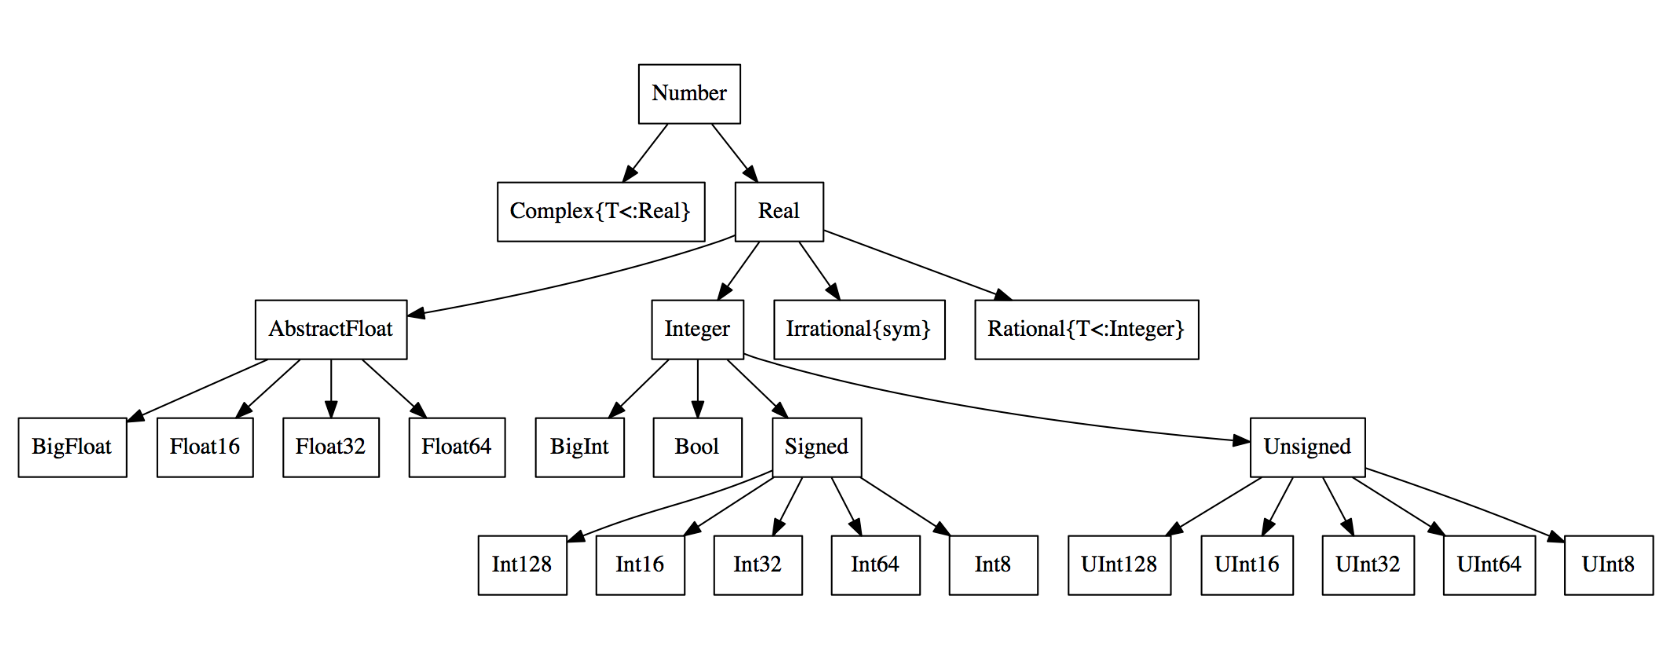

Julia provides commands to check the supertype (i.e., the type above a current type in the tree) and subtype (i.e., the types below) of any given type

In [10]:
supertype(Float64) # supertype of Float64 
subtypes(Integer) # subtypes of Integer

3-element Vector{Any}:
 Bool
 Signed
 Unsigned

### Starting from the Basics: Assigning Types

Just like python, you can assign a value to a varaible without explixitly expressing its type. The types will be inferred by the assigned value

In [11]:
#Ex: 
a = 5.0
b = 10

10

In [12]:
println("a has type:  ", typeof(a))
println("b has type:  ", typeof(b))

a has type:  Float64
b has type:  Int64


In Julia, we can also fix the type of a variable by using the :: operator. Usually, we fix the variable of type toi generate type-stable code

In [13]:
#Ex
c::Float64 = 5.0 # fixes type of a to generate type-stable code
d::Int = 10 # fixes type of a to generate type-stable code

10

In [14]:
#Once we fix the type of a variable, we cannot change it
d = 0.5

LoadError: InexactError: Int64(0.5)

A very useful function of Julia is that you can use greek letters by typing their latex name. Greek letters can be sued as variable names

In [15]:
#How: Latex_code (+press Tab) -->  \alpha (+ press Tab)
α = 5
#You can extend this capability of to all Unicode characters and operate on exotic variables:
# Create a variable called aleph with value 3 --> \aleph (+ press Tab) = 3
ℵ = 3
# Creates a phone with value 2 --> \:phone: (+ press Tab) = 2
☎ = 4
# Creates a whale with value 10 --> \:whale: (+ press Tab) = 10
🐳 = 10
# Sum both --> \aleph (+ press Tab) + \:whale: (+ press Tab)
ℵ + 🐳 + ☎

17

The set of variable stored in memory can be seen by using the varinfo() function

In [16]:
varinfo()

| name |    size | summary |
|:---- | -------:|:------- |
| Base |         | Module  |
| Core |         | Module  |
| Main |         | Module  |
| a    | 8 bytes | Float64 |
| b    | 8 bytes | Int64   |
| c    | 8 bytes | Float64 |
| d    | 8 bytes | Int64   |
| α    | 8 bytes | Int64   |
| ℵ    | 8 bytes | Int64   |
| ☎    | 8 bytes | Int64   |
| 🐳    | 8 bytes | Int64   |


In [42]:
# We can also check how much space a given variable occupied in the memory by using:
sizeof(a) #this variables occupied 8 bytes

#The space occupied by a variable can be liberated by setting it equal to nothing:
a = nothing 
sizeof(a)

#=
An improtant note: setting variable equal to nothing changes its type. 
As such, we cannot set "fixed" variables to nothing
=#

#for instance, setting d = nothing would raise an error

0

### Rational and Irrational Numbers

In [52]:
#Julia also has rational types on which you can perform operation
e = 1 // 2 # note // operator instead of /
f = 3//7
g = e+f

# Note: Julia will reduce a rational if the numerator and denominator have common factors.
h = 15 // 9 # --> will be reduced to 5//3

1//0

In [66]:
#we can extract the numerator and the denominator of a rational by applying:
numerator(g) # finds numerator of c 
denominator(g) # finds denominator of c

14

In [53]:
# Infinite rational numbers are acceptable:
a = 1 // 0

1//0

In [65]:
# But NaN are not 
try 
    a = 0 // 0
catch e
    println(e)
end

ArgumentError("invalid rational: zero(Int64)//zero(Int64)")


In [68]:
#Rational numbers can be converted to float
float(g)

0.9285714285714286

In [72]:
#=
Also... float can be converted to rational numbers. This can be done in 2 ways:
 1) rationalize: return that you expect --> approximate representation of the float, the return that you expect
 2) Rational: return that you do not expect -->  exact representation of the float
=#

rationalize(1.20) #returns what we expect (6//5)
Rational(1.20) #returns what we do not expect

5404319552844595//4503599627370496

In [73]:
# Julia also has some irrational type already predifines (ex: pi, e, etc...)
π

π = 3.1415926535897...

### More complex types

Here are some basic examples of how to declare a variable and assign it a value with different types:

In [75]:
var = 0x3 # unsigned integer, hexadecimal base
var = 0b11# unsigned integer, binary base
var = 3.0 # Float64
var = 4 + 3im # imaginary
var = complex(4,3) # same as above
var = true # boolean
var = "String" # string

"String"

By default: 
- Integer Values are stored as Int64
- Float Values are stored as Float64
***
For computation with large numbers, take advantage of the BigFloat type

In [76]:
typemin(Float64) # returns -Inf (just a convention)
typemin(Float64) # returns Inf (just a convention)
eps(Float64) # returns 2.22e-16 (machine precision of a type)
precision(Float64) # returns 53 (effective bits of a type in its mantissa)

53

Julia will take care of converting types automatically most of the times. However, you may want to explicitly convert and promote among types.
-     convert(T,x) # convert variable x to a type T
-     T(x) # same as above
-     promote(1, 1.0) # promotes both variables to 1.0, 1.0

In [79]:
k = 5 #k is Int64
k = convert(Float64,k)
typeof(k)

Float64

Some common variable manipulation:
- eval(a) --> evaluates expression a in a global scope real(a) # real part of a
- imag(a) --> imaginary part of a
- reim(a) --> real and imaginary part of a (a tuple) conj(a) # complex conjugate of a
- angle(a) --> phase angle of a in radians cis(a) # exp(i*a)
- sign(a) --> sign of a

Rounding, truncation, and module functions:
- round(a) --> rounding a to closest floating point natural ceil(a) # round up
- floor(a) --> round down
- trunc(a) --> truncate toward zero clamp(a,low,high) # returns a clamped to [a,b] mod2pi(a) # module after division by 2\pi
- modf(a) --> tuple with the fractional and integral part of a

## Strings

In [1]:
a ="I like economics" # string
b = a[1] # second component of string (here, 'I') 
b = a[end] # last component of string (here, 's')

# Note: b is a character and not a string --> typeof(b) will return Char, and string(b) will return b
# Also, if we define b as follows, it returns a string
b = a[1:1]

"I"

In [2]:
#Note that Julia uses " " for strings and ‘ ’ . If you want to have quotes inside the string, you use triple quotes """
println("""I like economics "with" quotes""") #  returns I like economics "with" quotes

I like economics "with" quotes


In [3]:
#We can create strings by concatenating characters or smaller strings
string('a','b') # returns ab
string("a","b") # returns ab
"a"*"b" # returns ab
" " # white space

" "

In [4]:
using Random # loads the required package for random character generation
randstring(10) # random string of n characters

"D5GcHJc5Jo"

In [5]:
#we can also put variables inside a string (similar to f funcitons)
a=3
string("a=$a") # returns a=3 b = true
#string(b) # returns "true"

"a=3"

In [6]:
#Some Useful Methods
firstindex("Economics") # returns 1 lastindex("Economics") # returns 9
uppercase("Economics") # returns ECONOMICS lowercase("ECONOMICS") # returns economics replace("Economics","cs"=>"a") # returns Economia reverse("Economics") # returns scimonocE
strip(" Economics ") # strips leading and trailing whitespace
lstrip(" Economics") # strips leading whitespace
rstrip("Economics ") # strips trailing whitespace
lpad("Economics",10) # returns Economics with left padding (10)
rpad("Economics",10) # returns Economics with right padding (10)


#Other Methods
occursin("Economics","E") # returns true 
occursin("Economics","M") # returns false
split("Economics","n") # returns ("Eco" "omics")
split("I like economics") # returns ("I" "like" "economics")

3-element Vector{SubString{String}}:
 "I"
 "like"
 "economics"

#### Priting and Reading

In [7]:
#Some Priting Functions

a=1
print(a) # basic printing functionality, no formatting 
println(a) # as before, plus a newline

using Printf

@printf("%d %.2f % c\n", 32, 34.51, 'a') # first an integer, second a float with two decimals, third a character
@printf("%s\n", "I like economics") # It will print a string
printstyled("a",color=:blue) # It will print with color

11
32 34.51 a
I like economics
a

In [ ]:
#Some Reading Fucntions
a = readline() #The basic reading function

#To deal with files, one needs to open them with a mode of operation and get a handle

f = open("results.txt", "r") # open file "results.txt" --> you can operate on it

read(f, String) # plain reading as a String
readdlm(f, ',') # read CSV file
readdlm(f,delim='\t';opts) # reading with general delimiters
write(f, "Economics") # plain writing
writedlm(f,A,delim='\t';opts) # writing with delimiters

#Then you need to close the file
close(f)

The modes of file operation are:
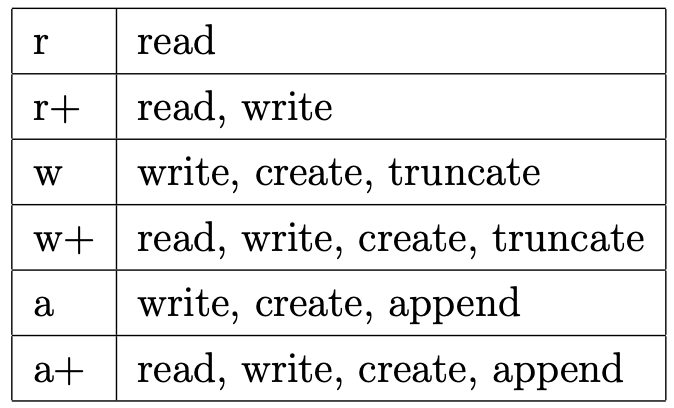